In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
sys.path.insert(0, "/Users/mbornhol/git/neural-profiling")
from utils import eval

In [ ]:
e = eval.evaluation(df_path= '925_aggregated_median.csv')
con = e.norm_agg()
res_enr = e.eval(con, operation = 'enrichment')
res_pre = e.eval(con, operation = 'precision_recall')
hit_ls = e.eval(con, operation = 'hit@k')
bins = np.arange(0,200,5)
h, bins = np.histogram(hit_ls[0], bins=bins)
hit = pd.DataFrame()
hit['bins'] = bins[:-1]
hit['h'] = h

res = pd.concat([res_enr, res_pre, hit], ignore_index=False, axis=1)
res.to_csv('925_results.csv', index=False)

res

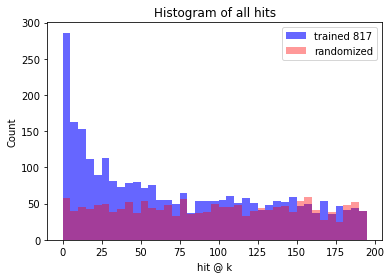

In [5]:
bins = np.arange(0,200,5)
plt.style.use({'figure.facecolor':'white'})
plt.hist(hit_ls[0], bins, alpha=0.6, color='blue', label='trained 817')
plt.hist(hit_ls[1], bins,alpha=0.4, color='red', label='randomized')
plt.xlabel('hit @ k')
plt.ylabel('Count')
plt.title('Histogram of all hits')
plt.legend()
plt.show()


In [6]:
# compare to others
e = eval.evaluation(df_path= '../811/811_aggregated_median.csv')
con = e.norm_agg()
comp_enr = e.eval(con, operation = 'enrichment')
res_enr_baseline = pd.read_csv('/Users/mbornhol/git/neural-profiling/baseline/results/res_enrichment_baseline.csv')

1280 features were identified


In [7]:
pre =  '/Users/mbornhol/git/neural-profiling/pre-trained/results/'
efficientnet_sphered = pd.read_csv(pre + 'res_enrichment_spherized.csv')

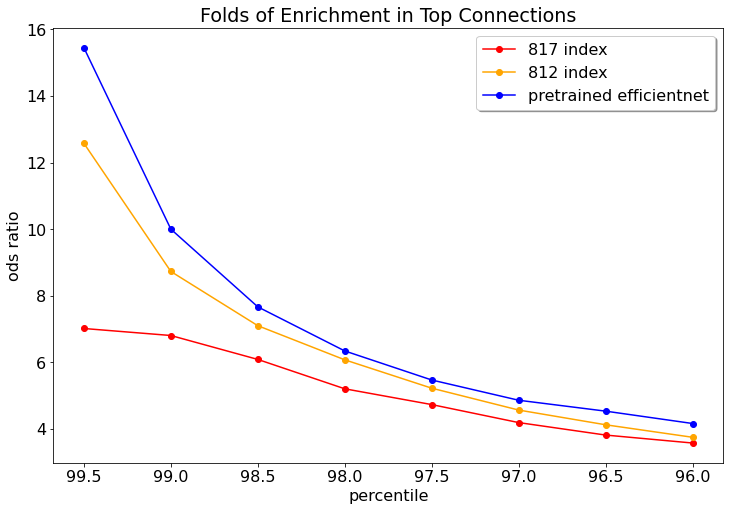

In [8]:
plt.style.use({'figure.facecolor':'white'})
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(figsize=(12,8))
plt.title("Folds of Enrichment in Top Connections")
plt.plot(100*res_enr["enrichment_percentile"], res_enr["ods_ratio"], marker="o", color="red", label = '817 index')
plt.plot(100*comp_enr["enrichment_percentile"], comp_enr["ods_ratio"], marker="o", color="orange", label = '812 index')
plt.plot(100*efficientnet_sphered["enrichment_percentile"], efficientnet_sphered["ods_ratio"], marker="o", color="blue", label = 'pretrained efficientnet')
plt.ylabel('ods ratio')
plt.xlabel('percentile')
ax.invert_xaxis()
plt.legend(loc = 'upper right', shadow=True)
plt.show()